<a href="https://colab.research.google.com/github/qv6963/-https-classroom.github.com-a-INNenYdr/blob/master/Course%202%20-%20Part%208%20-%20Lesson%202%20-%20Notebook%20(RockPaperScissors).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps.zip \
    -O /tmp/rps.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2025-04-11 20:09:26--  https://storage.googleapis.com/learning-datasets/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.207, 142.250.145.207, 74.125.128.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  38.8MB/s    in 6.2s    

2025-04-11 20:09:33 (30.8 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2025-04-11 20:09:33--  https://storage.googleapis.com/learning-datasets/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.207, 142.250.145.207, 74.125.128.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tm

In [3]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [4]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock03-012.png', 'rock05ck01-043.png', 'rock01-024.png', 'rock01-018.png', 'rock06ck02-027.png', 'rock02-053.png', 'rock04-072.png', 'rock05ck01-004.png', 'rock04-008.png', 'rock05ck01-113.png']
['paper01-043.png', 'paper05-083.png', 'paper05-018.png', 'paper07-014.png', 'paper04-048.png', 'paper01-012.png', 'paper04-095.png', 'paper05-005.png', 'paper03-035.png', 'paper06-012.png']
['scissors01-030.png', 'scissors04-024.png', 'scissors04-085.png', 'scissors03-096.png', 'testscissors01-020.png', 'scissors01-034.png', 'scissors01-103.png', 'testscissors02-115.png', 'testscissors02-103.png', 'scissors04-003.png']


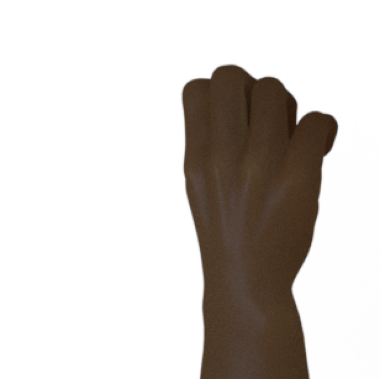

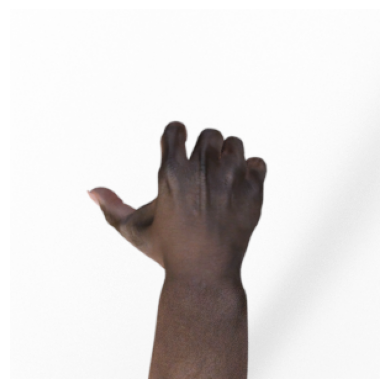

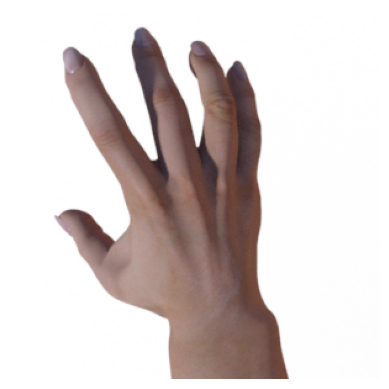

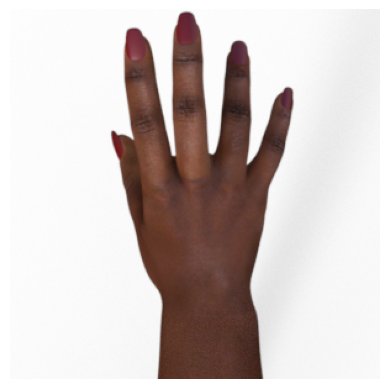

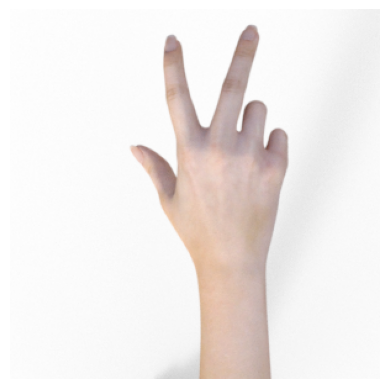

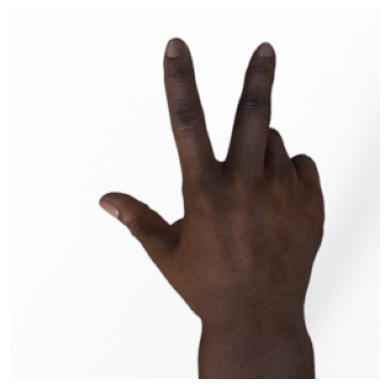

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [8]:
!pip install keras_preprocessing

import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.9 MB/s eta 0:00:00
Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,473,475 (13.25 MB)

 Trainable params: 3,473,475 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.3399 - loss: 1.1595 - val_accuracy: 0.3333 - val_loss: 1.0950
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.3719 - loss: 1.0941 - val_accuracy: 0.5054 - val_loss: 1.0311
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.4459 - loss: 1.0724 - val_accuracy: 0.5914 - val_loss: 1.0140
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5040 - loss: 1.0166 - val_accuracy: 0.6559 - val_loss: 0.7860
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.5885 - loss: 0.8426 - val_accuracy: 0.7849 - val_loss: 0.4984
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.6057 - loss: 0.8007 - val_accuracy: 0.8091 - val_loss: 0.5430
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6845 - loss: 0.6582 - val_accuracy: 0.5108 - val_loss: 0.8914
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7047 - loss: 0.6337 - val_accuracy: 0.9274 - val_loss:

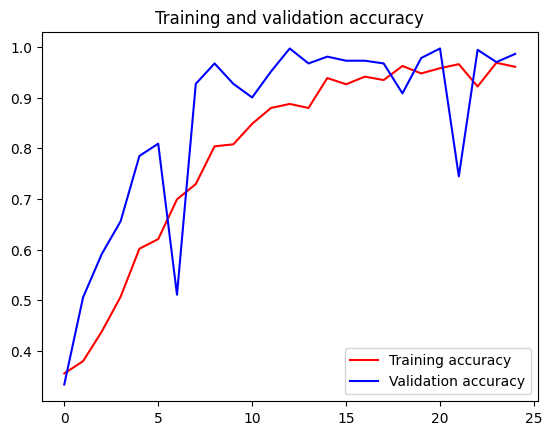

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [15]:
# import numpy as np
# from google.colab import files
# from keras.preprocessing import image

# uploaded = files.upload()

# for fn in uploaded.keys():

#   # predicting images
#   path = fn
#   img = image.load_img(path, target_size=(150, 150))
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)

#   images = np.vstack([x])
#   classes = model.predict(images, batch_size=10)
#   print(fn)
#   print(classes)
import zipfile
import os
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

# Step 1: Upload the zipped folder
uploaded = files.upload()

# Step 2: Unzip the uploaded folder
for fn in uploaded.keys():
    if fn.endswith('.zip'):
        with zipfile.ZipFile(fn, 'r') as zip_ref:
            zip_ref.extractall('uploaded_folder')  # change folder name if needed

# Step 3: Loop through files in the unzipped folder and predict
folder_path = 'uploaded_folder'

for root, dirs, files_in_dir in os.walk(folder_path):
    for file in files_in_dir:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(root, file)

            img = image.load_img(file_path, target_size=(150, 150))
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)

            images = np.vstack([x])
            classes = model.predict(images, batch_size=10)
            print(file)
            print(classes)


Saving rps-test-set.zip to rps-test-set.zip
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
testrock02-12.png
[[0. 1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
testrock03-05.png
[[0. 1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
testrock01-21.png
[[0. 1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
testrock04-11.png
[[0. 1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
testrock03-30.png
[[0. 1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
testrock02-24.png
[[0. 1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
testrock03-11.png
[[0. 1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
testrock04-08.png
[[0. 1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
testrock04-27.png
[[0. 1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
testrock02-07.png
[[0. 1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
testrock04-30.png
[[0. 1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
testrock04-18.png
[[0. 1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
testrock02-20.png
[[0. 1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
testrock01-02.png
[[0

Player 1, upload your hand gesture image:


Saving testpaper01-01.png to testpaper01-01 (2).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


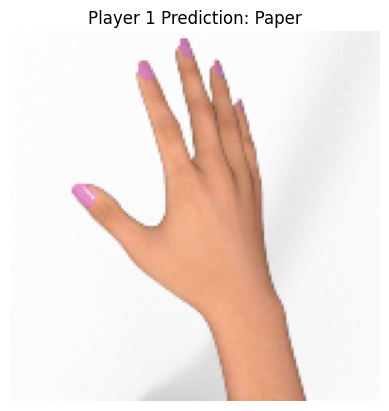

Player 2, upload your hand gesture image:


Saving testrock01-04.png to testrock01-04.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


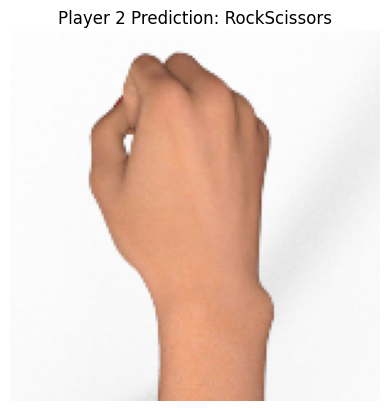

🕹️ Game Result: Player 2 Wins!


In [20]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define labels
labels = ['Paper','Rock' 'Scissors']

predicted_classes = []
file_names = []

# Upload images one by one
for player in [1, 2]:
    print(f"Player {player}, upload your hand gesture image:")
    uploaded = files.upload()
    fn = list(uploaded.keys())[0]
    file_names.append(fn)

    img = image.load_img(fn, target_size=(150, 150))  # Adjust based on model
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255.0  # Normalize if your model expects it

    pred = model.predict(x)
    predicted_class = np.argmax(pred[0])
    predicted_classes.append(predicted_class)

    # Show image and prediction
    plt.imshow(img)
    plt.title(f"Player {player} Prediction: {labels[predicted_class]}")
    plt.axis('off')
    plt.show()

# Game logic
def determine_winner(p1, p2):
    if p1 == p2:
        return "It's a Tie!"
    elif (p1 == 0 and p2 == 2) or (p1 == 1 and p2 == 0) or (p1 == 2 and p2 == 1):
        return "Player 1 Wins!"
    else:
        return "Player 2 Wins!"

# Determine and print result
result = determine_winner(predicted_classes[0], predicted_classes[1])
print("🕹️ Game Result:", result)
